In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/assignment02/Dataset.csv',encoding="ISO-8859-1")

In [5]:
dataset

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off dayâs high, up...",1


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [7]:
dataset['Text'] = dataset['Text'].apply(lambda x: x.lower())

In [8]:
dataset

,Text,Sentiment
0,kickers on my watchlist xide tit soq pnk cpw b...,1
1,user: aap movie. 55% return for the fea/geed i...,1
2,user i'd be afraid to short amzn - they are lo...,1
3,mnta over 12.00,1
4,oi over 21.37,1
...,...,...
5786,industry body cii said #discoms are likely to ...,-1
5787,"#gold prices slip below rs 46,000 as #investor...",-1
5788,workers at bajaj auto have agreed to a 10% wag...,1
5789,"#sharemarket live: sensex off dayâs high, up...",1


In [9]:
dataset['Text'] = dataset['Text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [10]:
dataset

,Text,Sentiment
0,kickers on my watchlist xide tit soq pnk cpw b...,1
1,user aap movie 55 return for the feageed indic...,1
2,user id be afraid to short amzn they are look...,1
3,mnta over 1200,1
4,oi over 2137,1
...,...,...
5786,industry body cii said discoms are likely to s...,-1
5787,gold prices slip below rs 46000 as investors b...,-1
5788,workers at bajaj auto have agreed to a 10 wage...,1
5789,sharemarket live sensex off days high up 600 p...,1


In [12]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(dataset['Text'].values)
X = tokenizer.texts_to_sequences(dataset['Text'].values)
print(X)
X = pad_sequences(X)

[[4, 41, 392, 1379, 77, 162, 75, 136, 65], [11, 8, 933, 771, 7, 1, 66, 330, 573, 7, 1, 164, 1231], [11, 934, 22, 2, 16, 105, 111, 30, 87, 29, 3, 5, 9], [20, 1123], [477, 20], [20], [8, 11, 34, 67, 163, 1, 625, 772, 18, 86, 66, 3, 880, 773, 5, 772], [1380, 626, 1124, 1015, 1381, 1553, 1554, 299, 438], [45, 142, 123, 340, 341, 28, 89], [8, 18, 49, 156, 7, 71, 182], [158, 412, 376, 156, 46, 1, 935, 56, 52, 165, 189, 29, 14, 238], [13, 227, 128, 157, 548, 1232, 1, 69, 2, 413, 1778, 774, 549, 76, 61, 65, 190, 48, 241, 260], [8, 201, 10, 1382, 496, 143, 331], [11, 598, 27, 15, 936, 27, 361, 10, 92, 60, 1383, 6, 239], [599, 10, 176, 55, 2, 309, 127, 4, 414, 28, 362, 71, 238], [687, 1233, 937, 938, 1016, 186], [11, 228, 7, 24, 32, 15, 4, 142, 86, 19, 119, 75, 86, 600, 84, 142, 86, 55, 2, 1384, 720], [21, 412, 130, 46, 182, 87, 7, 3, 627, 5, 2, 12, 775, 651, 4, 202, 7, 68, 182], [11, 143, 145, 90, 29, 9, 78, 56, 217, 104, 393, 1, 688, 145, 26], [1385, 881, 142, 123], [310, 54, 62, 93, 311, 415,

In [13]:
X.shape

(5791, 30)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
embed_dim = 128
lstm_out = 196
model = Sequential()

model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(lstm_out,return_sequences=True, recurrent_dropout=0.5)))
model.add(Bidirectional(LSTM(lstm_out,return_sequences=True, recurrent_dropout=0.5)))
model.add(Bidirectional(LSTM(lstm_out, recurrent_dropout=0.5)))
model.add(Dense(2,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt,metrics = ['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 30, 128)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 30, 392)          509600    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 30, 392)          923552    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 392)              923552    
 nal)                                                   

In [15]:
X.shape

(5791, 30)

In [21]:
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(dataset['Sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,shuffle=True, random_state = 46)


In [22]:
#Learning rate=0.01
batch_size = 128
history=model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size)

Epoch 1/7
37/37 [==============================] - 42s 1s/step - loss: 0.3353 - true_positives: 3977.0000 - true_negatives: 3977.0000 - false_positives: 655.0000 - false_negatives: 655.0000 - accuracy: 0.8586
Epoch 2/7
37/37 [==============================] - 43s 1s/step - loss: 0.2730 - true_positives: 4139.0000 - true_negatives: 4139.0000 - false_positives: 493.0000 - false_negatives: 493.0000 - accuracy: 0.8936
Epoch 3/7
37/37 [==============================] - 42s 1s/step - loss: 0.2181 - true_positives: 4251.0000 - true_negatives: 4251.0000 - false_positives: 381.0000 - false_negatives: 381.0000 - accuracy: 0.9177
Epoch 4/7
37/37 [==============================] - 42s 1s/step - loss: 0.1868 - true_positives: 4296.0000 - true_negatives: 4296.0000 - false_positives: 336.0000 - false_negatives: 336.0000 - accuracy: 0.9275
Epoch 5/7
37/37 [==============================] - 41s 1s/step - loss: 0.1637 - true_positives: 4343.0000 - true_negatives: 4343.0000 - false_positives: 289.0000 - 

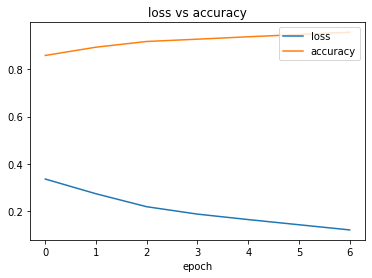

In [23]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 


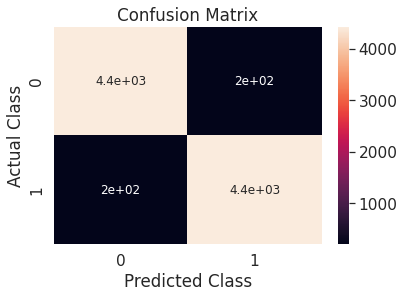

In [24]:
import seaborn as sn
array = [[history.history['true_positives'][-1],history.history['false_positives'][-1]],
         [history.history['false_negatives'][-1],history.history['true_negatives'][-1]]]
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) 
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('Confusion_Matrix.png')
pyplot.show()

In [25]:
print('Accuracy:',model.evaluate(X_test,Y_test)[-1])

37/37 [==============================] - 65s 101ms/step - loss: 0.6876 - true_positives: 912.0000 - true_negatives: 912.0000 - false_positives: 247.0000 - false_negatives: 247.0000 - accuracy: 0.7869
Accuracy: 0.7868852615356445


In [26]:
from sklearn.metrics import classification_report
Y_preds=tf.round(model.predict(X_test))
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       445
           1       0.84      0.80      0.82       714

   micro avg       0.79      0.79      0.79      1159
   macro avg       0.78      0.78      0.78      1159
weighted avg       0.79      0.79      0.79      1159
 samples avg       0.79      0.79      0.79      1159

